<a href="https://colab.research.google.com/github/setthawut8/ai/blob/main/nlp/%5Bclassify%5D_TH2EN_EBL_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download Data and Library Installation
Inspiration: https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/

In [ ]:
!pip install flair 
!pip install fairseq
!pip install pythainlp
!pip install transformers
!pip install sacremoses sentencepiece

In [2]:
#libraby 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import string
import os, os.path
import pandas as pd
import seaborn as sns
from google.colab import files

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from pythainlp.translate import Translate

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.utils.class_weight import compute_class_weight

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Data

##Social FSI

In [3]:
# #download data
# #[Social FSI] 
# #download raw
# !gdown :) 
# !gdown :) 

# #read raw 
# train = pd.read_excel('/content/preprocessed_v1_socialfsi_single_train_sampling12150_20220701.xlsx')
# test = pd.read_excel('/content/preprocessed_v1_socialfsi_single_test_sampling389_20220701.xlsx')

In [ ]:
# [Social FSI] 
#download raw with translated
!gdown :) 
!gdown :) 

#read raw with translated
train = pd.read_excel('/content/translated_Text_train_FSI.xlsx')
test = pd.read_excel('/content/translated_Text_test_FSI.xlsx')

In [5]:
train.head(1)

,Unnamed: 0,Unnamed: 0.1,TagFile_Path,TagFile,SV_CustomerName,Main keyword,Channel,SubChannel,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,Text_ws_local,translated
0,0,0,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1400_2022...,Krungthai_NEXT,"mobile banking+กสิกร,mobile banking+ธนาคารกสิก...",SocialMedia,forum,pantip.com_topic_41249919,Q2207_1549,Q2207_1549_1,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,"Product and Service, Usage and Condition",8,neutral,o,สอบถาม|เรื่อง|การ|อายัด|บัตรเดบิต|ของ|kbank|ค่...,I've been asking about the debit card holders....


In [6]:
test.head(1)

,Unnamed: 0,Unnamed: 0.1,TagFile_Path,TagFile,SV_CustomerName,Main keyword,Channel,SubChannel,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,Text_ws_local,translated
0,0,0,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_SV-FSI-20201101-29-20201201-25_Sampl...,NaN,NaN,SocialMedia,Pantip,5fdb2543b08b582c303ceba3,Q202106_4598,Q202106_4598_1,ในอนาคตธนาคารเกียรตินาคินภัทรจะมีบัตรเครดิตไหม...,ในอนาคตธนาคารเกียรตินาคินภัทรจะมีบัตรเครดิตไหม...,"Product and Service, Variety",10,neutral,o,ในอนาคต|ธนาคาร|kk|ภัทร|จะ|มี|บัตรเครดิต|ไหม|คร...,Is there a credit card in the future for honor...


In [7]:
train.shape, test.shape

((12150, 19), (389, 19))

In [8]:
print("Train Unique Classes: ", train['Human_Category'].nunique(), "Test Unique Classes: ", test['Human_Category'].nunique())

Train Unique Classes:  13 Test Unique Classes:  12


##KTB

In [ ]:
# # [KTB] raw
# !gdown :) #train
# !gdown :) #test

# # [KTB] translated from Text_original
!gdown :) #train
!gdown :) #test

# # [KTB] translated from Text
!gdown #train
!gdown #test

In [ ]:
#translated from Text_original
train = pd.read_csv('/content/train_textOriginal_translated banking data.csv')
test = pd.read_csv('/content/test_textOriginal_translated banking data.csv')

In [ ]:
#translated from Text
train = pd.read_csv('/content/train_text_translated banking data.csv')
test = pd.read_csv('/content/test_text_translated banking data.csv')

In [ ]:
train.shape, test.shape

((26088, 15), (581, 15))

In [ ]:
train.head(1)

,Unnamed: 0,TagFile,channel,Question,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,text_ws_local,translated
0,0,KTBOpenendSummaryMonth08_YTD2020(NPS)_Detractor,Branch,NaN,499,Q2107_1,Q2107_1_1,อยากให้ Call Center รับสาย ติดต่อง่าย,อยากให้ Call Center รับสาย ติดต่อง่าย,Call Center,12,recommendation,r,อยากให้| |call| |center| |รับสาย| |ติดต่อ|ง่าย,"I want Call Center on the phone, easy to reach."


In [ ]:
test.head(1)

,Unnamed: 0,TagFile,channel,Question,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,text_ws_local,translated
0,0,Krungthai_Branch_TACallAPI20220401-20220630_Sa...,Branch,Q8,1001498Q8,Q2207_1,Q2207_1_1,สาขาควนขนุน ให้บริการดีมากๆๆแล้วค่ะ ดีใจที่ได้...,สาขาควนขนุน ให้บริการดีมากๆๆแล้วค่ะ,"Staff, Service and Take Ownership",5,positive,p,สาขา|ค|วน|ข|นุน| |ให้บริการ|ดี|มากๆ| |ๆ|แล้ว|ค...,Quan Kun is very well served. I'm glad I'm her...


In [ ]:
print("Train Unique Classes: ", train['Human_Category'].nunique(), "Test Unique Classes: ", test['Human_Category'].nunique())

Train Unique Classes:  25 Test Unique Classes:  23


#Translation

In [ ]:
train.head(1)

,Unnamed: 0,TagFile_Path,TagFile,SV_CustomerName,Main keyword,Channel,SubChannel,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,Text_ws_local
0,0,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1400_2022...,Krungthai_NEXT,"mobile banking+กสิกร,mobile banking+ธนาคารกสิก...",SocialMedia,forum,pantip.com_topic_41249919,Q2207_1549,Q2207_1549_1,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,"Product and Service, Usage and Condition",8,neutral,o,สอบถาม|เรื่อง|การ|อายัด|บัตรเดบิต|ของ|kbank|ค่...


In [ ]:
test.head(1)

,Unnamed: 0,TagFile_Path,TagFile,SV_CustomerName,Main keyword,Channel,SubChannel,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,Text_ws_local
0,0,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_SV-FSI-20201101-29-20201201-25_Sampl...,NaN,NaN,SocialMedia,Pantip,5fdb2543b08b582c303ceba3,Q202106_4598,Q202106_4598_1,ในอนาคตธนาคารเกียรตินาคินภัทรจะมีบัตรเครดิตไหม...,ในอนาคตธนาคารเกียรตินาคินภัทรจะมีบัตรเครดิตไหม...,"Product and Service, Variety",10,neutral,o,ในอนาคต|ธนาคาร|kk|ภัทร|จะ|มี|บัตรเครดิต|ไหม|คร...


In [ ]:
th2en = Translate('th', 'en')

In [ ]:
train_filename = 'translated_Text_train_'
test_filename = 'translated_Text_test_'
task = 'FSI'

In [ ]:
#translate train
train['translated'] = train['Text'].apply(lambda x: th2en.translate(str(x))) #2h40m46s
#If can't, ask pythainlp forum or discussion: https://github.com/PyThaiNLP/pythainlp/discussions

In [ ]:
#train with a translated column
train.head(1)

,Unnamed: 0,TagFile_Path,TagFile,SV_CustomerName,Main keyword,Channel,SubChannel,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,Text_ws_local,translated
0,0,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1400_2022...,Krungthai_NEXT,"mobile banking+กสิกร,mobile banking+ธนาคารกสิก...",SocialMedia,forum,pantip.com_topic_41249919,Q2207_1549,Q2207_1549_1,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,"Product and Service, Usage and Condition",8,neutral,o,สอบถาม|เรื่อง|การ|อายัด|บัตรเดบิต|ของ|kbank|ค่...,I've been asking about the debit card holders....


In [ ]:
train_downloading_path = train_filename + task + '.xlsx'
train.to_excel(train_downloading_path)
files.download(train_downloading_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#translate test
test['translated'] = test['Text'].apply(lambda x: th2en.translate(str(x)))

In [ ]:
#test with a translated column
test.head(1)

,Unnamed: 0,TagFile_Path,TagFile,SV_CustomerName,Main keyword,Channel,SubChannel,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,Text_ws_local,translated
0,0,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_SV-FSI-20201101-29-20201201-25_Sampl...,NaN,NaN,SocialMedia,Pantip,5fdb2543b08b582c303ceba3,Q202106_4598,Q202106_4598_1,ในอนาคตธนาคารเกียรตินาคินภัทรจะมีบัตรเครดิตไหม...,ในอนาคตธนาคารเกียรตินาคินภัทรจะมีบัตรเครดิตไหม...,"Product and Service, Variety",10,neutral,o,ในอนาคต|ธนาคาร|kk|ภัทร|จะ|มี|บัตรเครดิต|ไหม|คร...,Is there a credit card in the future for honor...


In [ ]:
test_downloading_path = test_filename + task + '.xlsx'
test.to_excel(test_downloading_path)
files.download(test_downloading_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Train Embedding Layer

In [9]:
train_docs = train['translated']
test_docs = test['translated']

In [10]:
#Encode each document as a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_docs)
encoded_docs = tokenizer.texts_to_sequences(train_docs)

In [11]:
#as each sentences contain different length of words, we need padding to make the sequences the same length before
#putting into the embedding layer
max_length = max([len(s.split()) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
ytrain = np.array(train['Human_CategoryID'].tolist())

In [12]:
max_length

190

In [13]:
#do the same as train above for test
encoded_docs = tokenizer.texts_to_sequences(test_docs)
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
ytest = np.array(test['Human_CategoryID'].tolist())

In [14]:
#defind vocabulary size
vocab_size = len(tokenizer.word_index) + 1

In [15]:
#Count unique classes
print(train['Human_CategoryID'].nunique(), test['Human_CategoryID'].nunique())

13 12


In [16]:
#Count unique classes
num_classes = max(train['Human_CategoryID'].nunique(), test['Human_CategoryID'].nunique())
print(num_classes)

13


In [17]:
from tensorflow.keras.utils import to_categorical

#Multi class problems need one-hot encoding on y
#why - 1 on ytrain and ytest? can follow the linke below
#https://stackoverflow.com/questions/56204731/the-method-np-utils-to-categorical-give-me-an-error/59002957#59002957
ytrain =  to_categorical(ytrain-1, num_classes=num_classes)
ytest = to_categorical(ytest-1, num_classes=num_classes)

In [18]:
vocab_size = len(tokenizer.word_index)+1

#Model

##DO0.5 CNN1 CNN1 GMP1D D128 D13: 49


In [19]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
import tensorflow as tf

In [20]:
#Inspiration: https://keras.io/examples/nlp/text_classification_from_scratch/

from keras.layers.pooling import GlobalMaxPooling1D
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))
model.add(Dropout(0.5))
model.add(Conv1D(128, 7 , padding='valid',strides=3, activation='relu'))
model.add(Conv1D(128, 7 , padding='valid',strides=3, activation='relu'))
#Among filters=[64,128,256], 128 is the best. 
#activation selu, tanh, relu, elu got similar results
model.add(GlobalMaxPooling1D()) #Among pooliing, GMP1D is the best.

model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax')) #1 Dense better than 2 Denses
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 190, 1000)         11603000  
                                                                 
 dropout (Dropout)           (None, 190, 1000)         0         
                                                                 
 conv1d (Conv1D)             (None, 62, 128)           896128    
                                                                 
 conv1d_1 (Conv1D)           (None, 19, 128)           114816    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                        

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [22]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Get the similar results

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 30s 96ms/step - loss: 1.8769 - acc: 0.3765 - val_loss: 1.5837 - val_acc: 0.4872
Epoch 2/10
304/304 [==============================] - 29s 94ms/step - loss: 1.3864 - acc: 0.5604 - val_loss: 1.5236 - val_acc: 0.5144
Epoch 3/10
304/304 [==============================] - 29s 94ms/step - loss: 0.9364 - acc: 0.7012 - val_loss: 1.6738 - val_acc: 0.5062


In [23]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 9ms/step - loss: 1.6936 - acc: 0.4910
Test Accuracy: 49.100256


In [24]:
#prediction
y_pred = model.predict(Xtest)

In [25]:
#Change one hot answer to be single digit as follows 
#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel

rounded_labels_ypred = np.argmax(y_pred, axis=1)
rounded_labels_ytest = np.argmax(ytest,axis=1)

##CNN LSTM GMP1D D13: 49

In [26]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed

In [27]:
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_length, trainable=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(LSTM(50, return_sequences=True))

model.add(GlobalMaxPooling1D())
model.add(Flatten())

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 190, 100)          1160300   
                                                                 
 conv1d_2 (Conv1D)           (None, 188, 32)           9632      
                                                                 
 lstm (LSTM)                 (None, 188, 50)           16600     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 13)                663       
                                                      

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [29]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 31s 94ms/step - loss: 1.9667 - acc: 0.3361 - val_loss: 1.7496 - val_acc: 0.4403
Epoch 2/10
304/304 [==============================] - 30s 98ms/step - loss: 1.6095 - acc: 0.4842 - val_loss: 1.5761 - val_acc: 0.5000
Epoch 3/10
304/304 [==============================] - 31s 103ms/step - loss: 1.3468 - acc: 0.5901 - val_loss: 1.5092 - val_acc: 0.5185
Epoch 4/10
304/304 [==============================] - 30s 100ms/step - loss: 1.1368 - acc: 0.6569 - val_loss: 1.5598 - val_acc: 0.5226


In [30]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 20ms/step - loss: 1.6342 - acc: 0.4987
Test Accuracy: 49.871466


##BIGRU CNN1 TDD GMP1D D13: 50

In [31]:
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM

from tensorflow.keras.layers import TimeDistributed, Bidirectional, GRU

In [32]:
#Define our model

model = Sequential()

model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))
#Bi-GRU with TimeDistributed by Tul 
model.add(Bidirectional(GRU(units=256,return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))

model.add(Conv1D(128, 5 , activation='tanh'))
model.add(TimeDistributed(Dense(128, activation="relu")))
model.add(GlobalMaxPooling1D())

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 190, 1000)         11603000  
                                                                 
 bidirectional (Bidirectiona  (None, 190, 512)         1932288   
 l)                                                              
                                                                 
 conv1d_3 (Conv1D)           (None, 186, 128)          327808    
                                                                 
 time_distributed (TimeDistr  (None, 186, 128)         16512     
 ibuted)                                                         
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                      

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [34]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Get the similar results

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 701s 2s/step - loss: 1.6950 - acc: 0.4471 - val_loss: 1.4625 - val_acc: 0.5235
Epoch 2/10
304/304 [==============================] - 687s 2s/step - loss: 1.2389 - acc: 0.5999 - val_loss: 1.4180 - val_acc: 0.5407
Epoch 3/10
304/304 [==============================] - 672s 2s/step - loss: 0.8112 - acc: 0.7393 - val_loss: 1.5387 - val_acc: 0.5391


In [35]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 5s 383ms/step - loss: 1.7471 - acc: 0.5039
Test Accuracy: 50.385606


In [36]:
#Save the model
model.save('TH2EN_GRU.h5')

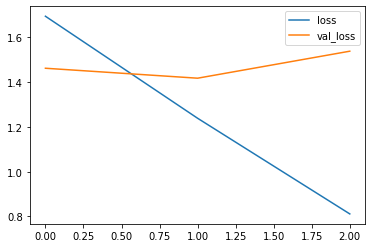

In [37]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

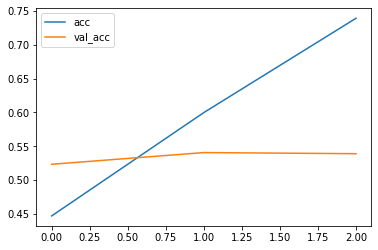

In [38]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

##BILSTM CNN1 TDD GMP1D D13: 51

In [39]:
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout

from tensorflow.keras.layers import TimeDistributed, Bidirectional, GRU, LSTM

In [40]:
#Define our model

model = Sequential()

model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))
#Bi-LSTM with TimeDistributed by Tul 
model.add(Bidirectional(LSTM(units=256,return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))

model.add(Conv1D(128, 5 , activation='tanh'))
model.add(TimeDistributed(Dense(128, activation="relu")))
model.add(GlobalMaxPooling1D())

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 190, 1000)         11603000  
                                                                 
 bidirectional_1 (Bidirectio  (None, 190, 512)         2574336   
 nal)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 186, 128)          327808    
                                                                 
 time_distributed_1 (TimeDis  (None, 186, 128)         16512     
 tributed)                                                       
                                                                 
 global_max_pooling1d_3 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                      

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [42]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Get the similar results

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 772s 3s/step - loss: 1.6897 - acc: 0.4529 - val_loss: 1.4772 - val_acc: 0.5132
Epoch 2/10
304/304 [==============================] - 765s 3s/step - loss: 1.2300 - acc: 0.6112 - val_loss: 1.4249 - val_acc: 0.5317
Epoch 3/10
304/304 [==============================] - 762s 3s/step - loss: 0.8145 - acc: 0.7386 - val_loss: 1.6585 - val_acc: 0.4992


In [43]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 7s 521ms/step - loss: 1.7129 - acc: 0.5116
Test Accuracy: 51.156813


## CNN1 GMP1D D13: 54


In [44]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
import tensorflow as tf

In [45]:
from keras.layers.pooling import GlobalMaxPooling1D
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))
model.add(Conv1D(128, 10 , activation='relu'))
#Among filters=[64,128,256], 128 is the best. 
#kernel_size is better for 10.
#activation selu, tanh, relu, elu got similar results
model.add(GlobalMaxPooling1D()) #Among pooliing, GMP1D is the best.

model.add(Dense(num_classes, activation='softmax')) #1 Dense better than 2 Denses
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 190, 1000)         11603000  
                                                                 
 conv1d_5 (Conv1D)           (None, 181, 128)          1280128   
                                                                 
 global_max_pooling1d_4 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_7 (Dense)             (None, 13)                1677      
                                                                 
Total params: 12,884,805
Trainable params: 12,884,805
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [47]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Get the similar results

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 51s 165ms/step - loss: 1.6540 - acc: 0.4577 - val_loss: 1.3968 - val_acc: 0.5420
Epoch 2/10
304/304 [==============================] - 50s 165ms/step - loss: 0.9512 - acc: 0.6980 - val_loss: 1.3819 - val_acc: 0.5621
Epoch 3/10
304/304 [==============================] - 50s 164ms/step - loss: 0.3261 - acc: 0.9192 - val_loss: 1.4955 - val_acc: 0.5473


In [48]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100)) #79.333335 (CNN filter = 10), 78 (CNN filter = 5)

13/13 [==============================] - 0s 19ms/step - loss: 1.4866 - acc: 0.5476
Test Accuracy: 54.755783


In [49]:
#prediction
y_pred = model.predict(Xtest)

#Change one hot answer to be single digit as follows 
#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel

rounded_labels_ypred = np.argmax(y_pred, axis=1)
rounded_labels_ytest = np.argmax(ytest,axis=1)

## 3CNN1 3DO0.5 3MP1D F D130 D13: 53
inspired from https://machinelearningmastery.com/develop-n-gram-multichannel-convolutional-neural-network-sentiment-analysis/#:~:text=13%20pm%20%23-,Wouldn%E2%80%99t,-the%20model%20below


In [50]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
import tensorflow as tf

In [51]:
from keras.layers.pooling import GlobalMaxPooling1D
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))
model.add(Conv1D(128, 10 , activation='relu'))
#Among filters=[64,128,256], 128 is the best. 
#kernel_size is better for 10.
#activation selu, tanh, relu, elu got similar results
model.add(GlobalMaxPooling1D()) #Among pooliing, GMP1D is the best.

model.add(Dense(num_classes, activation='softmax')) #1 Dense better than 2 Denses
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 190, 1000)         11603000  
                                                                 
 conv1d_6 (Conv1D)           (None, 181, 128)          1280128   
                                                                 
 global_max_pooling1d_5 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 13)                1677      
                                                                 
Total params: 12,884,805
Trainable params: 12,884,805
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [53]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Get the similar results

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 51s 166ms/step - loss: 1.6480 - acc: 0.4583 - val_loss: 1.3886 - val_acc: 0.5449
Epoch 2/10
304/304 [==============================] - 50s 164ms/step - loss: 0.9579 - acc: 0.6973 - val_loss: 1.3673 - val_acc: 0.5539
Epoch 3/10
304/304 [==============================] - 50s 165ms/step - loss: 0.3226 - acc: 0.9205 - val_loss: 1.5100 - val_acc: 0.5325


In [54]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100)) #79.333335 (CNN filter = 10), 78 (CNN filter = 5)

13/13 [==============================] - 0s 19ms/step - loss: 1.5271 - acc: 0.5321
Test Accuracy: 53.213370


In [55]:
#prediction
y_pred = model.predict(Xtest)

#Change one hot answer to be single digit as follows 
#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel

rounded_labels_ypred = np.argmax(y_pred, axis=1)
rounded_labels_ytest = np.argmax(ytest,axis=1)

##3CNN1 3DO0.1 3GP1D D256 D13: 55 (with class weights)
inspiration: [click](https://machinelearningmastery.com/develop-n-gram-multichannel-convolutional-neural-network-sentiment-analysis/#:~:text=REPLY-,Francesco,-January%2025%2C%202018%20at%209%3A13) 

In [56]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed, concatenate
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
import tensorflow as tf
import keras
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam

In [57]:
# create the model
model = Sequential()
inputs = Input(shape=(max_length,))

# channel 1
embedding1 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv1 = Conv1D(128, 6, activation='relu')(embedding1)
drop1 = Dropout(0.1)(conv1)
pool1 = GlobalMaxPooling1D()(drop1)
# channel 2
embedding2 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv2 = Conv1D(128, 8, activation='relu')(embedding2)
drop2 = Dropout(0.1)(conv2)
pool2 = GlobalMaxPooling1D()(drop2)
# channel 3
embedding3 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv3 = Conv1D(128, 10, activation='relu')(embedding3)
drop3 = Dropout(0.1)(conv3)
pool3 = GlobalMaxPooling1D()(drop3)

# merge
merged = concatenate([pool1, pool2, pool3])

# Fully connected 
outputs = Dense(num_classes, activation='softmax')(merged) #1 Dense better than 2 or three Denses

model = Model(inputs=[inputs], outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 190)]        0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 190, 1000)    11603000    ['input_1[0][0]']                
                                                                                                  
 embedding_7 (Embedding)        (None, 190, 1000)    11603000    ['input_1[0][0]']                
                                                                                                  
 embedding_8 (Embedding)        (None, 190, 1000)    11603000    ['input_1[0][0]']                
                                                                                              

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

#Learning Rate = 0.01, acc = 40%

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [59]:
train_y = [x-1 for x in train['Human_CategoryID'].tolist()]

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_y),
                                        y = train_y                                                   
                                    )
class_weights = dict(zip(np.unique(train_y), class_weights))

In [60]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Get the similar results

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    class_weight=class_weights)

Epoch 1/10
304/304 [==============================] - 104s 337ms/step - loss: 2.3060 - acc: 0.2622 - val_loss: 1.8801 - val_acc: 0.3753
Epoch 2/10
304/304 [==============================] - 102s 337ms/step - loss: 0.8605 - acc: 0.6469 - val_loss: 1.4651 - val_acc: 0.5082
Epoch 3/10
304/304 [==============================] - 102s 336ms/step - loss: 0.2316 - acc: 0.9002 - val_loss: 1.4068 - val_acc: 0.5444
Epoch 4/10
304/304 [==============================] - 102s 335ms/step - loss: 0.0697 - acc: 0.9766 - val_loss: 1.3991 - val_acc: 0.5551
Epoch 5/10
304/304 [==============================] - 102s 335ms/step - loss: 0.0260 - acc: 0.9944 - val_loss: 1.4507 - val_acc: 0.5630


In [62]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 1s 41ms/step - loss: 1.5131 - acc: 0.5553
Test Accuracy: 55.526990


In [63]:
#prediction
y_pred = model.predict(Xtest)

#Change one hot answer to be single digit as follows 
#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel

rounded_labels_ypred = np.argmax(y_pred, axis=1)
rounded_labels_ytest = np.argmax(ytest,axis=1)

#Plot Confusion and Classification Report

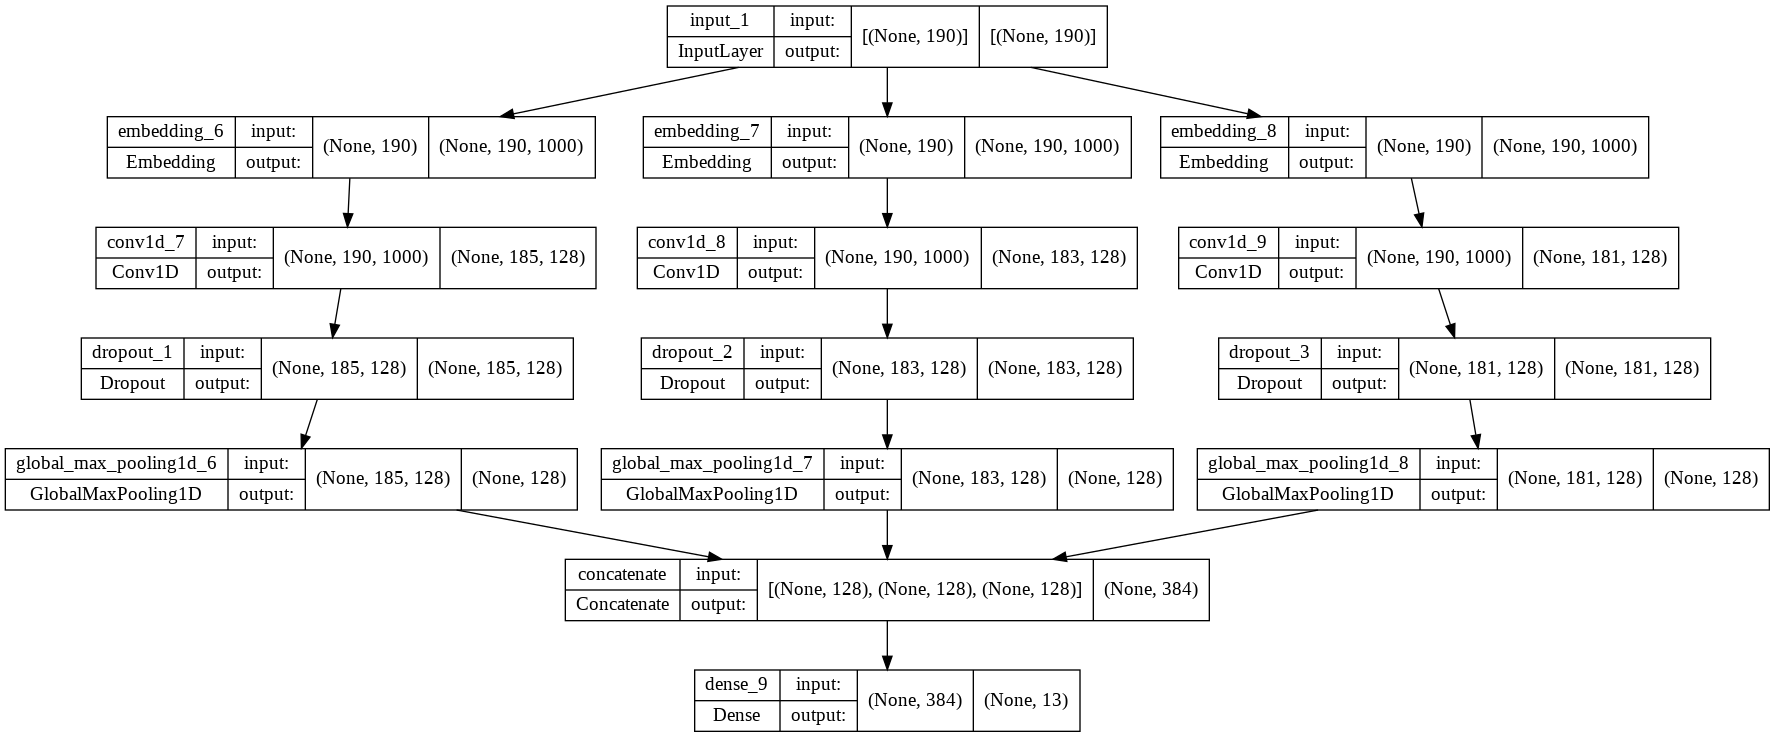

In [64]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# from google.colab import files
# files.download('model_plot.png')

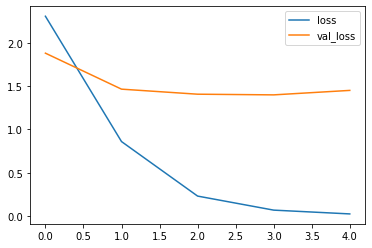

In [65]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

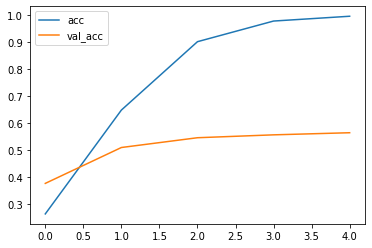

In [66]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [67]:
#Find dict of label ids and names.
if train['Human_CategoryID'].nunique() < test['Human_CategoryID'].nunique():
  print('train_unique_classes')
  classes_with_id_dict = {id-1: labels for id, labels in zip(train['Human_CategoryID'], train['Human_Category'])}
  print(len(classes_with_id_dict))
else:
  print('test_unique_classes')
  classes_with_id_dict = {id-1: labels for id, labels in zip(test['Human_CategoryID'], test['Human_Category'])}
  print(len(classes_with_id_dict))

classes_with_id_dict

test_unique_classes
12


{0: 'Accessibility',
 2: 'Company Brand',
 3: 'Staff Quality',
 4: 'Timing',
 5: 'Product and Service, Benefit',
 6: 'Product and Service, System',
 7: 'Product and Service, Usage and Condition',
 8: 'Product and Service, Convenience',
 9: 'Product and Service, Variety',
 10: 'Product and Service, Decision',
 11: 'Security',
 12: 'No Category'}

In [68]:
#get an labels array in the conseuctive order based on id number.
train_unique_classes = train['Human_CategoryID'].nunique()
test_unique_classes = test['Human_CategoryID'].nunique()

#find the label total
if train['Human_CategoryID'].nunique() > test['Human_CategoryID'].nunique():
  print('test_unique_classes')
  classes_with_id = test_unique_classes
else:
  print('train_unique_classes')
  classes_with_id = train_unique_classes

#convert a dict to an array
classes_array = ["" for x in range(classes_with_id+1)]

for id, label in classes_with_id_dict.items():
  classes_array[id] = label

#delete empty string for classification report
classes_array = [label for label in classes_array if label != ""]
classes_array
print(len(classes_array))

test_unique_classes
12


In [69]:
from sklearn.metrics import classification_report

print(classification_report(rounded_labels_ytest, rounded_labels_ypred, target_names=classes_array, zero_division=0))

                                          precision    recall  f1-score   support

                           Accessibility       0.60      0.43      0.50         7
                           Company Brand       0.29      0.17      0.21        12
                           Staff Quality       0.42      0.29      0.34        17
                                  Timing       0.65      0.71      0.68        28
            Product and Service, Benefit       0.67      0.56      0.61        32
             Product and Service, System       0.59      0.81      0.68        84
Product and Service, Usage and Condition       0.54      0.68      0.61        92
        Product and Service, Convenience       0.80      0.36      0.50        11
            Product and Service, Variety       0.50      0.17      0.25        12
           Product and Service, Decision       0.40      0.20      0.27        10
                                Security       0.00      0.00      0.00         3
               

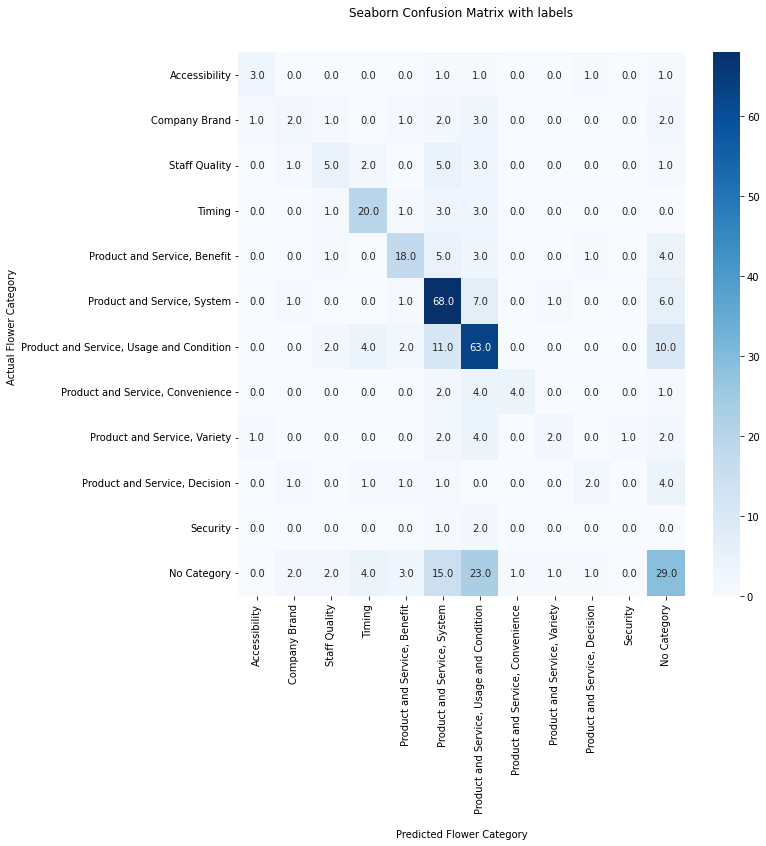

In [70]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(rounded_labels_ytest, rounded_labels_ypred)

fig, ax = plt.subplots(figsize=(10,10))    
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax, fmt=".1f")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Flower Category')
ax.set_ylabel('Actual Flower Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(classes_array, rotation=90)
ax.yaxis.set_ticklabels(classes_array, rotation=0)

## Display the visualization of the Confusion Matrix.
plt.show()

figure = ax.get_figure()    
figure.savefig("cf_matrix.png", pad_inches= 12, dpi=400)

#Save Model

In [ ]:
#Save the model
model.save('my_model.h5')

In [ ]:
test['prediction'] = rounded_labels_ypred+1
test.to_excel('CNN_prediction.xlsx')

files.download('CNN_prediction.xlsx')

#Import Installed Library

In [ ]:
#Download all library in the code
!pip freeze > requirements.txt

In [ ]:
#Download library without colab libraries
from pip._internal.utils.misc import get_installed_distributions
import sys
#import numpy as np # imported to test whether numpy shows up, which it does!

def get_imported_packages():
    p = get_installed_distributions()
    p = {package.key:package.version for package in p}
    imported_modules = set(sys.modules.keys())
    imported_modules.remove('pip')
    modules = [(m, p[m]) for m in imported_modules if p.get(m, False)]
    return modules


def generate_requirements(filepath:str, modules):
    with open(filepath, 'w') as f:
        for module, version in modules:
            f.write(f"{module}=={version}\n")


generate_requirements('requirements.txt', get_imported_packages())